# **Task**

Eliminating imbalances and checking the impact on model accuracy

In [1]:
#mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier

In [3]:
scaler = StandardScaler()
ceed = 42


#Load data

In [4]:
#define clolumns names
data_columns = ["ID","RI","NA2O","MGO","AL203","SIO2",
                "K2O","CAO","BAO","FE203","TYPE"]
# define data to variable
data = pd.read_csv("/content/drive/MyDrive/Hillel_ML_Course/7/glass.data",
                                                          names=data_columns)

In [5]:
data.head()

,ID,RI,NA2O,MGO,AL203,SIO2,K2O,CAO,BAO,FE203,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   NA2O    214 non-null    float64
 3   MGO     214 non-null    float64
 4   AL203   214 non-null    float64
 5   SIO2    214 non-null    float64
 6   K2O     214 non-null    float64
 7   CAO     214 non-null    float64
 8   BAO     214 non-null    float64
 9   FE203   214 non-null    float64
 10  TYPE    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
#check nan values in columns
data.isna().sum()

,0
ID,0
RI,0
NA2O,0
MGO,0
AL203,0
SIO2,0
K2O,0
CAO,0
BAO,0
FE203,0


In [8]:
#drop columns "ID"
data = data.drop(columns="ID", axis=0).copy()

In [9]:
data.head()

,RI,NA2O,MGO,AL203,SIO2,K2O,CAO,BAO,FE203,TYPE
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

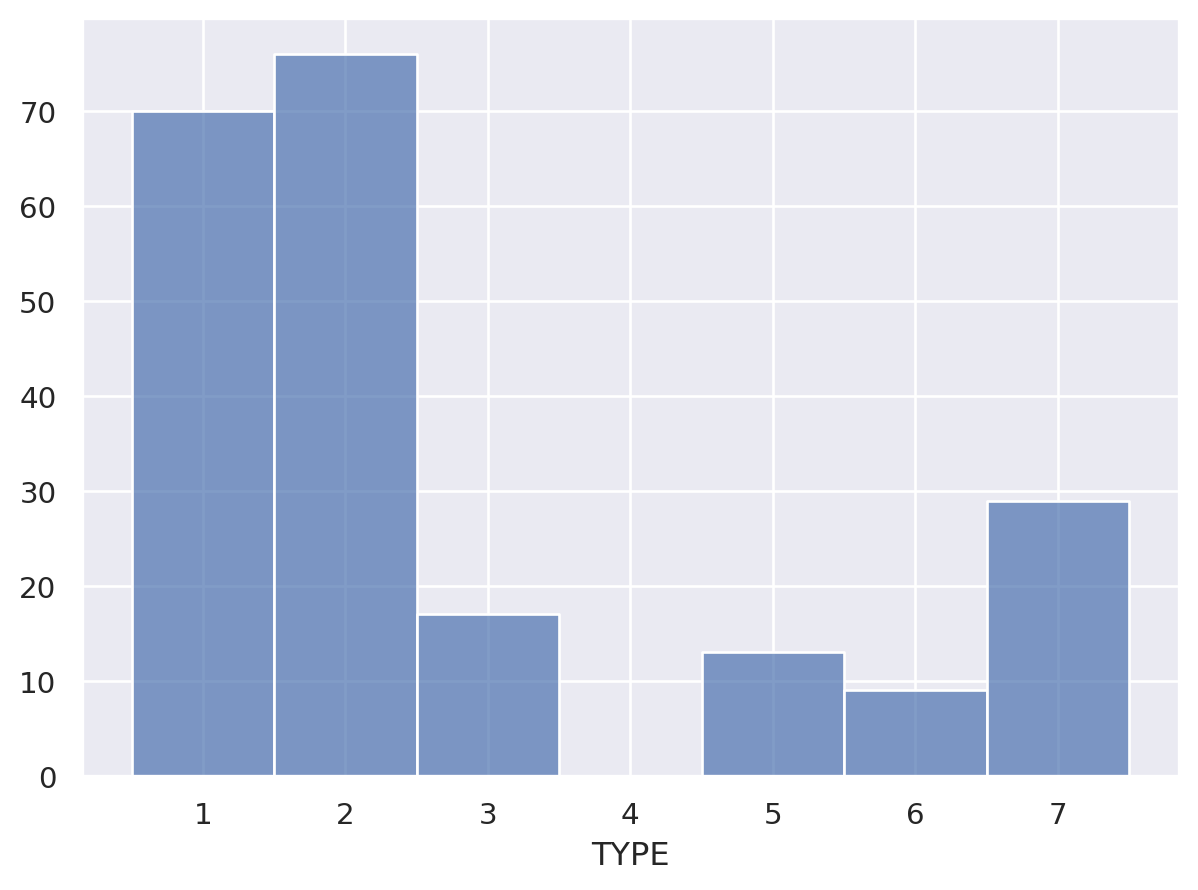

In [10]:
#let's see balance of classes

target_balance = so.Plot(data, "TYPE")
target_balance.add(so.Bars(), so.Hist(discrete=True))

Plot below shows that class is unbalanced

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

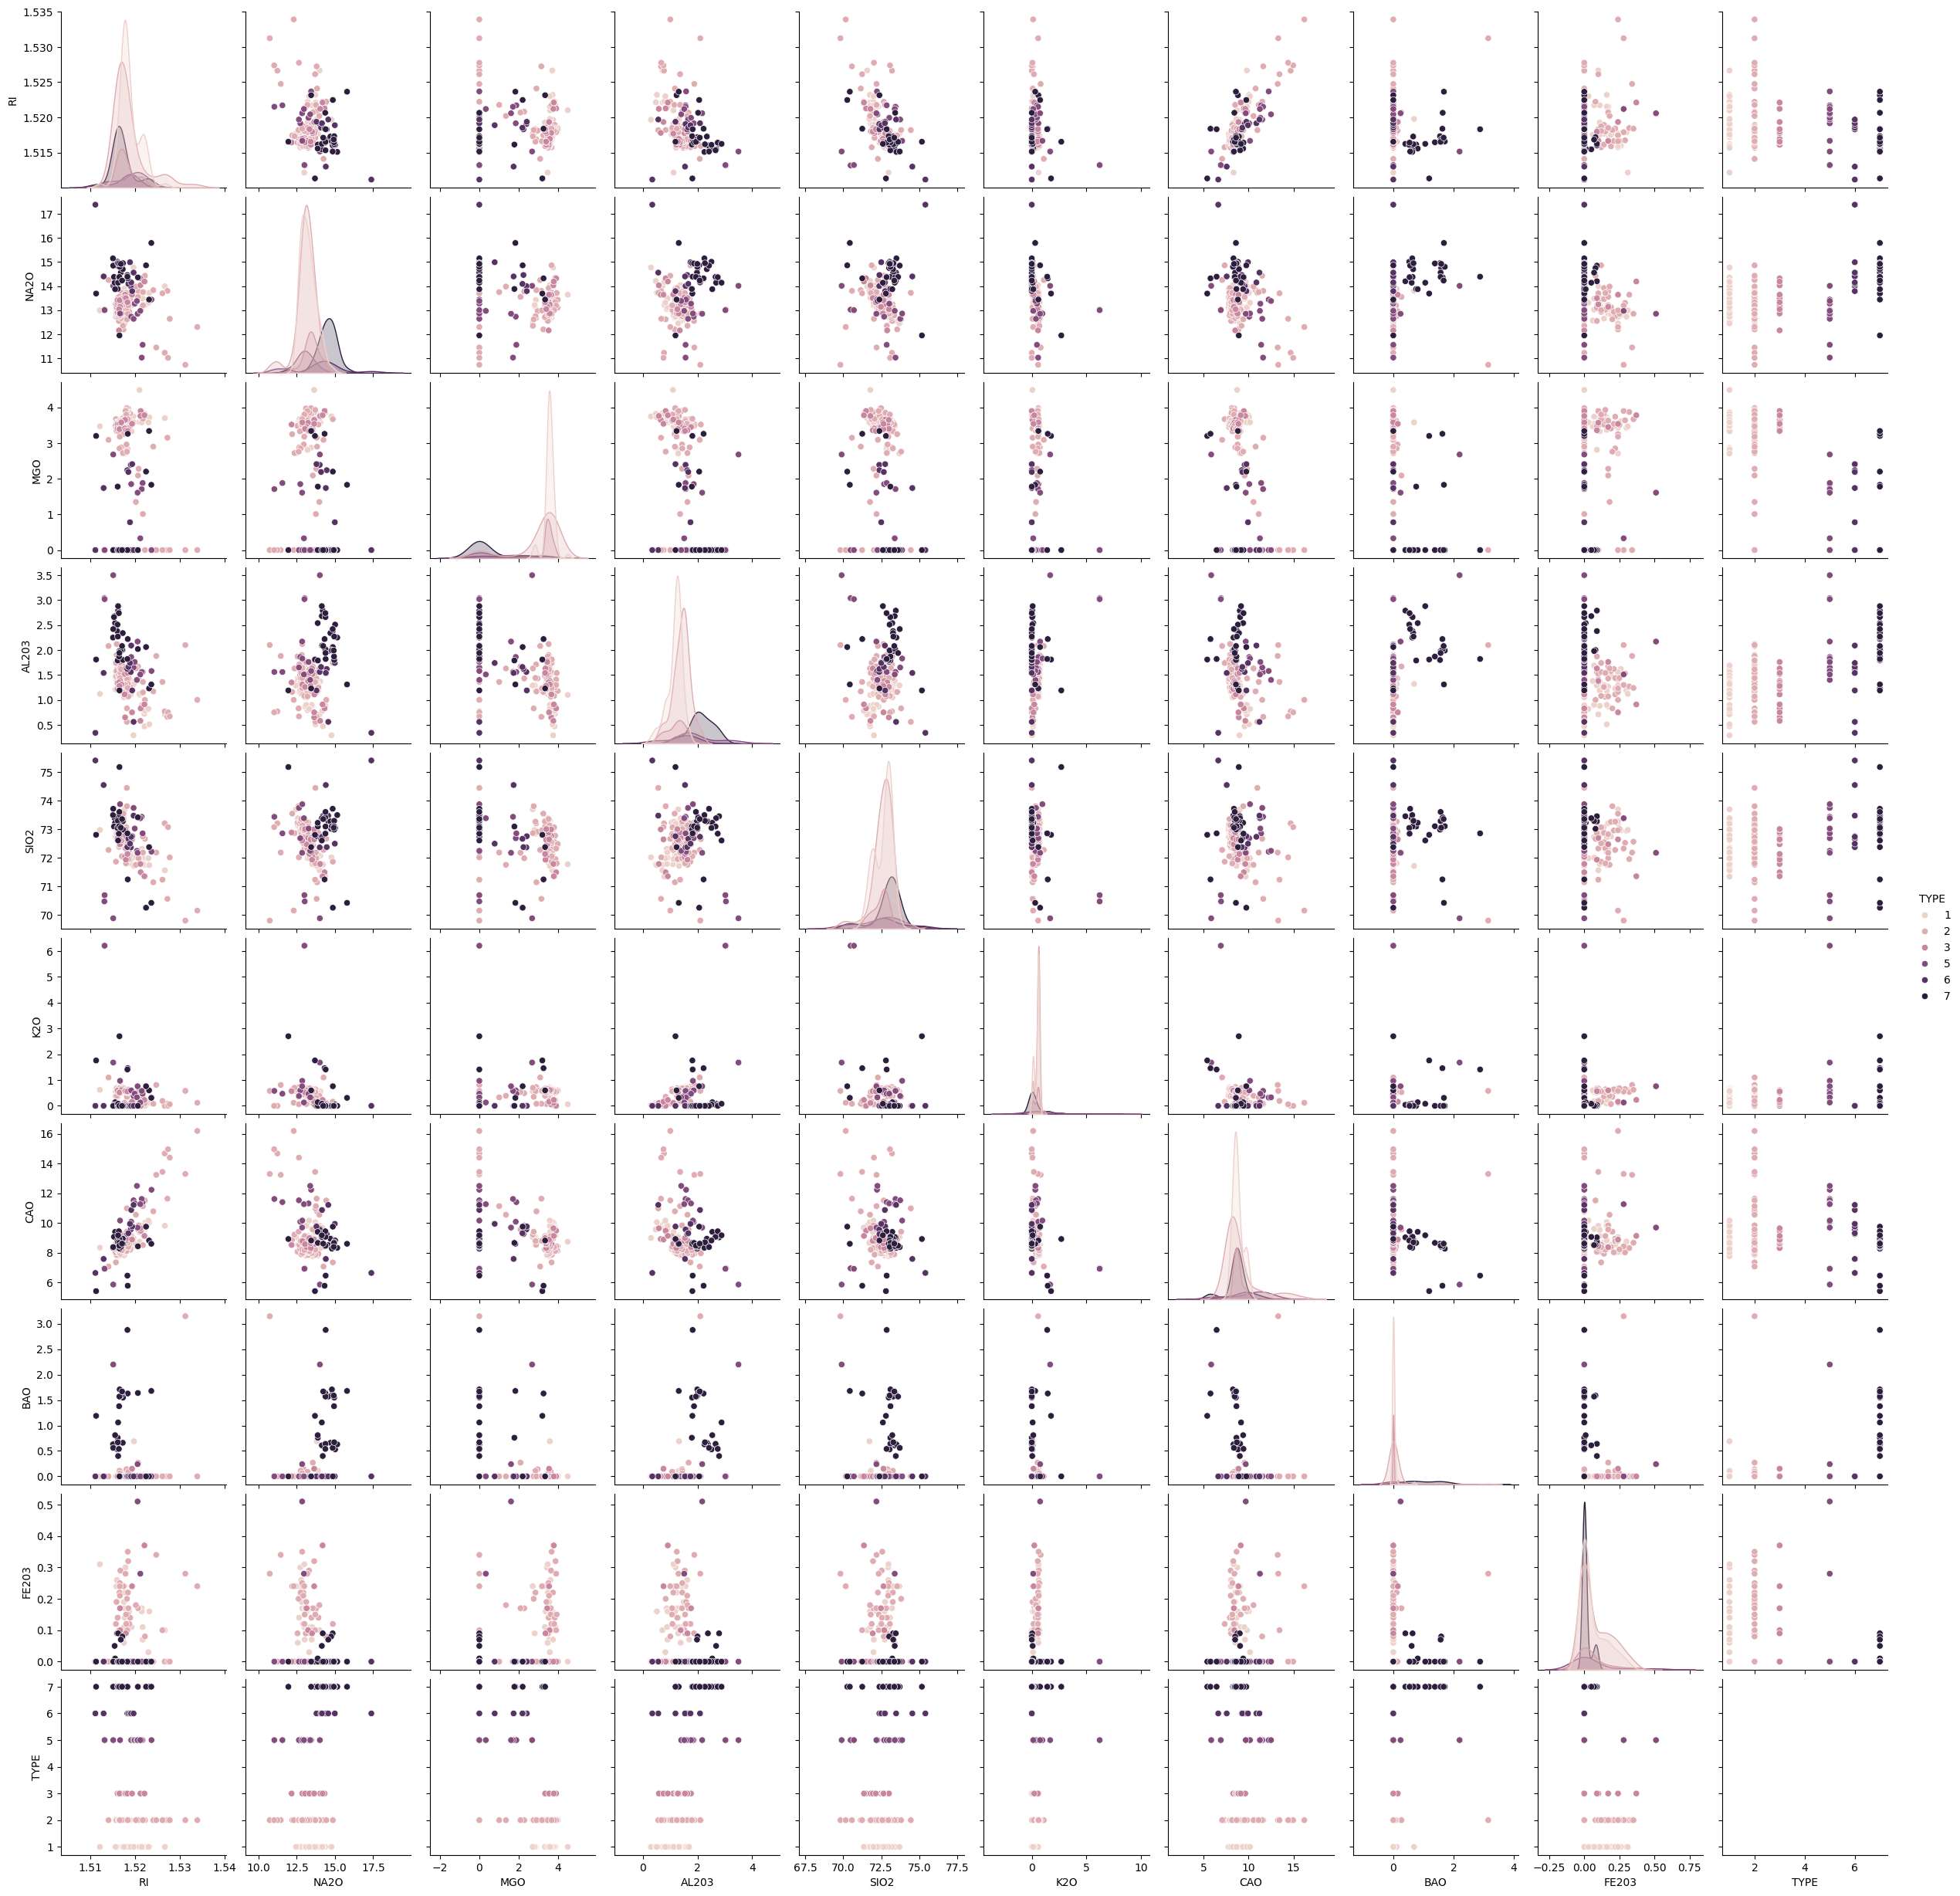

In [11]:
#Let see dependeces
sns.pairplot(data=data, vars=data.columns.to_list(), hue='TYPE')
plt.show()

# Split data

In [12]:

X = data.drop(columns="TYPE")
y = data["TYPE"]

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                shuffle=True, random_state=ceed)

In [14]:
X_train.shape, X_test.shape

((171, 9), (43, 9))

#Train baseline KNN

In [15]:
# define classes to list

classes = data["TYPE"].unique()

In [16]:
# define classifier
knn_clf = KNeighborsClassifier()

In [17]:
# make base pipeline

base_pipeline= make_pipeline(scaler,knn_clf)

In [18]:
base_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [19]:
#estimate cv
base_cv = cross_val_score(base_pipeline, X_train, y_train, cv=5, scoring="roc_auc_ovr")
print(f"cross validation baseline score is: {base_cv.mean()}")

cross validation baseline score is: 0.8353734319852085


few hours later i was surprised that this score is nothing if you not descover report

In [20]:
# baseline predeict values
base_pred =  base_pipeline.predict(X_test)

In [21]:
# create dataframe with predicted values
pred = pd.DataFrame()
pred["pred"] = base_pred

In [22]:
# reset index to add test data for pred dataframe
y_pred_test = y_test.reset_index().drop(columns="index")
pred["test"] = y_pred_test

In [23]:
# create variable with method to score data with roc_auc metric
y_proba = base_pipeline.predict_proba(X_test)

## classification report and confusion matrix

In [24]:
# print out report
print(classification_report(y_test, base_pred))


              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Conclusion**

as we see from report scores for any classes are different so this score shows, that model is not works correct

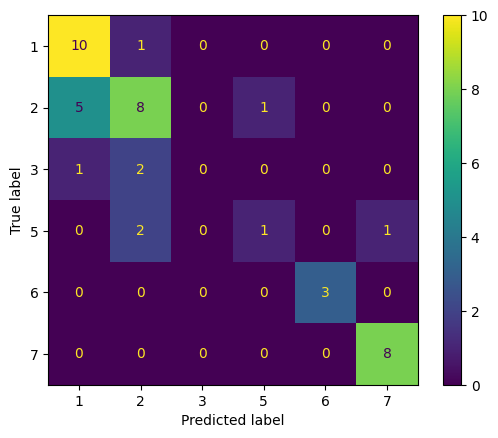

In [25]:
# plot confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, base_pred)

plt.show()

**Conclusion**

from this confusion matrix i see that 1st, 2nd and 3rd classes can have data with close values

##fit data with roc_auc

To display how roc auc fit data i read [Multiclass classification evaluation with ROC Curves and ROC AUC](https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a)
and used functions from [ROC Curve - Multiclass](https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb)

In [26]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [27]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [28]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

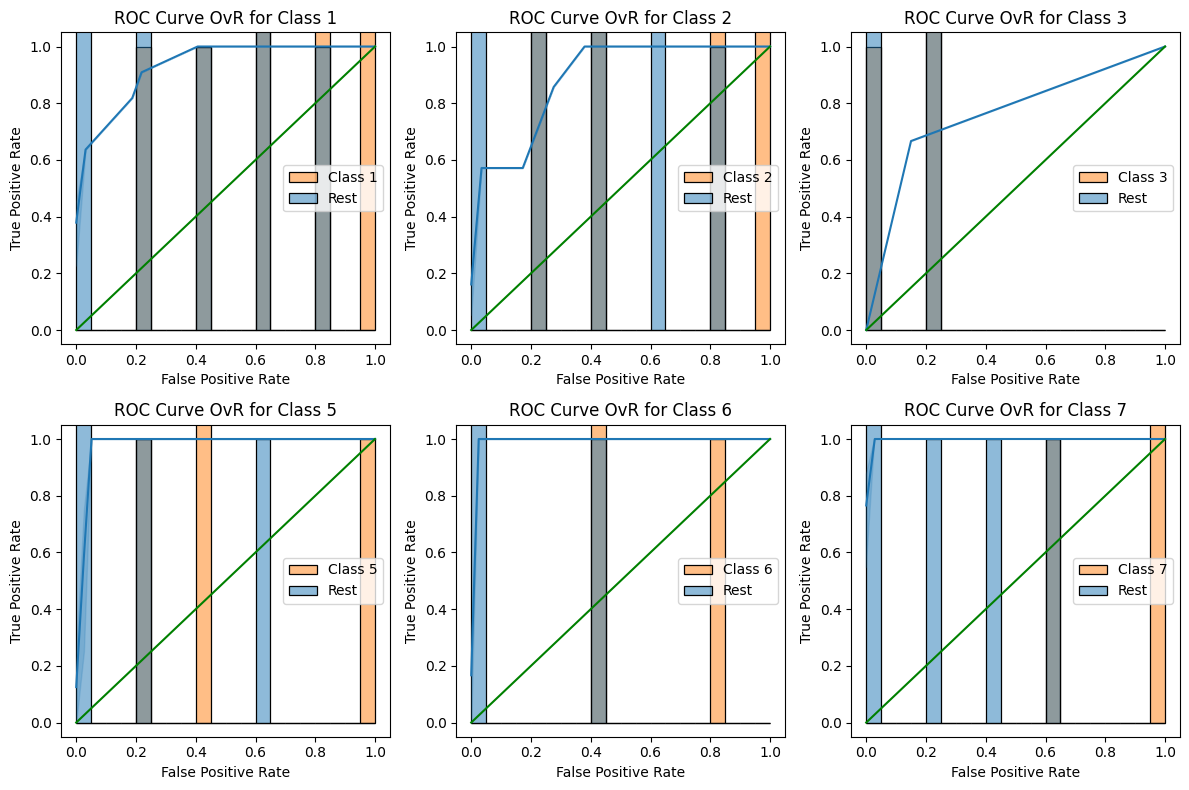

In [29]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliary dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i + 1)  # Верхній ряд для розподілів
    sns.histplot(x="prob", data=df_aux, hue='class', ax=ax, bins=bins)
    ax.set_title(f"Class {c}")
    ax.legend([f"Class {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    # Plots the ROC curve (нижній ряд для ROC-кривих)
    ax_bottom = plt.subplot(2, 3, i + 1)  # Інкремент для переходу до нижнього ряду
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title(f"ROC Curve OvR for Class {c}")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()
plt.show()


#SMOTE (Synthetic Minority Over-sampling Technique)

In [30]:
smote_sampler = SMOTE(random_state=ceed)

In [31]:
X_smote, y_smote = smote_sampler.fit_resample(X, y)

In [32]:
X.shape, X_smote.shape

((214, 9), (456, 9))

In [33]:
y_smote

,TYPE
0,1
1,1
2,1
3,1
4,1
...,...
451,7
452,7
453,7
454,7


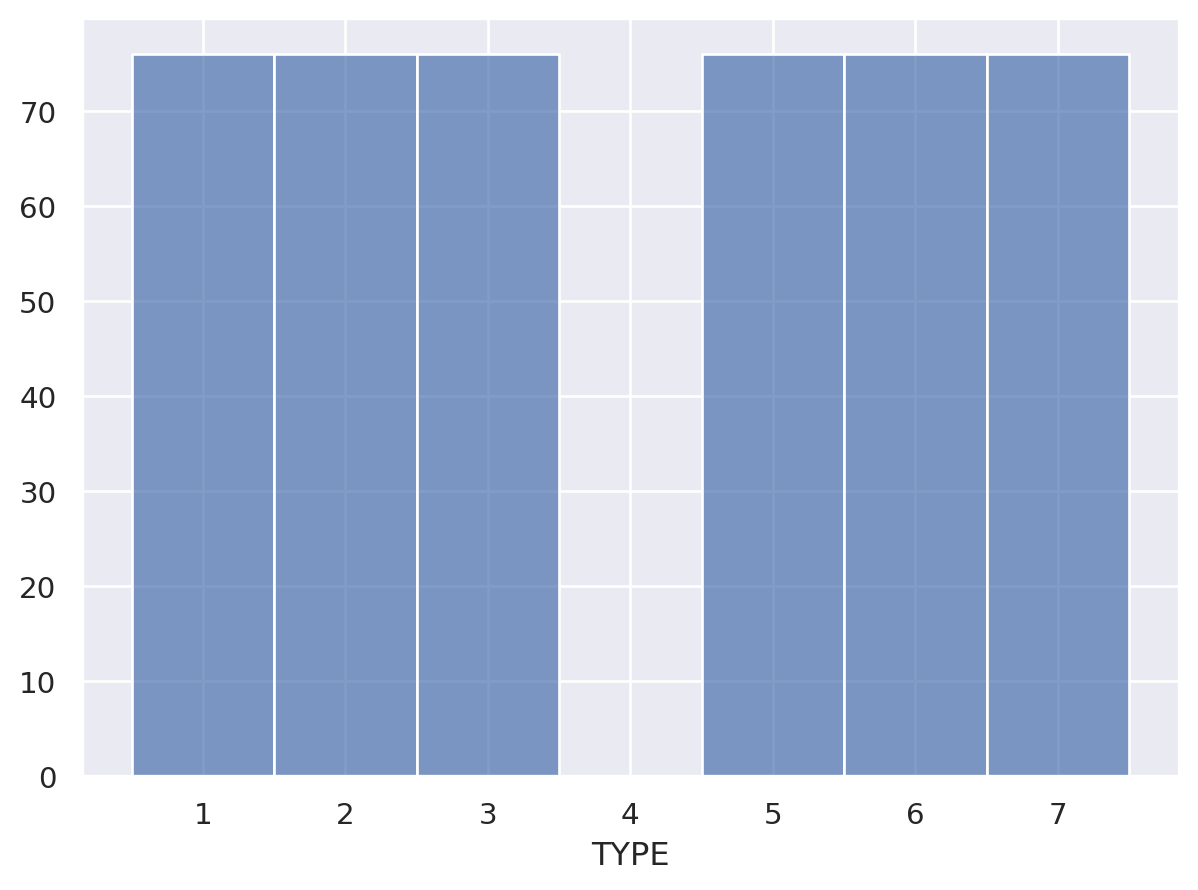

In [34]:
#let's see balance of classes

target_balance = so.Plot(y_smote)
target_balance.add(so.Bars(), so.Hist(discrete=True))

As we see it made full balance

## train test split

In [35]:
# split into train and test data

X_smote_train, X_smote_test, y_smote_train, \
               y_smote_test = train_test_split(X_smote, y_smote, train_size=0.8,
                                               shuffle=True, random_state=ceed)

## make pipeline

In [36]:
smote_pipeline = make_pipeline(scaler, knn_clf)
smote_pipeline.fit(X_smote_train, y_smote_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

##CV score

In [37]:
#cross validation score
smote_cv_score = cross_val_score(smote_pipeline, X_smote_train, y_smote_train,
                                 cv=5, scoring="roc_auc_ovr")

#print out score

print(f"cross validation score after synthtic balance data is {smote_cv_score.mean()}")

cross validation score after synthtic balance data is 0.9519712744358255


##Classification report and confusion matrix

In [38]:
smote_pred = smote_pipeline.predict(X_smote_test)

In [39]:
# print out report
print(classification_report(y_smote_test, smote_pred))


              precision    recall  f1-score   support

           1       0.75      0.71      0.73        17
           2       0.82      0.74      0.78        19
           3       0.54      0.70      0.61        10
           5       1.00      1.00      1.00        14
           6       0.93      1.00      0.97        14
           7       1.00      0.94      0.97        18

    accuracy                           0.85        92
   macro avg       0.84      0.85      0.84        92
weighted avg       0.86      0.85      0.85        92



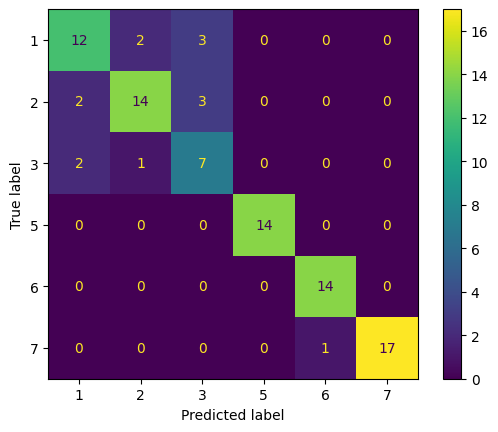

In [40]:
# plot confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_smote_test, smote_pred)

plt.show()

**Conclusion**

SMOTE made score better on this data, but let's try modify data, because classes 1,2,3 still looks same

### make difference between classes first 3 classes

In [41]:
# create dataset
data_test = pd.concat([X,y], axis=1)

In [42]:
# change all rows which column TYPE == 1 by ^2
data_test.loc[data_test["TYPE"] == 1, :] = \
                    data_test.loc[data_test["TYPE"] == 1].apply(lambda x: x**2)

In [43]:
# change all raws whci column TYPE ==3 except data in column TYPE

data_test.loc[data_test["TYPE"] == 3, data_test.columns != "TYPE"] = \
                    data_test.loc[data_test["TYPE"] == 3].apply(lambda x: x**3)

In [44]:
X_poly = data_test.drop(columns="TYPE")
y_poly = data_test["TYPE"]

In [45]:
X_smote, y_smote = smote_sampler.fit_resample(X_poly, y_poly)

In [46]:
X.shape, X_smote.shape

((214, 9), (456, 9))

In [47]:
y_smote

,TYPE
0,1
1,1
2,1
3,1
4,1
...,...
451,7
452,7
453,7
454,7


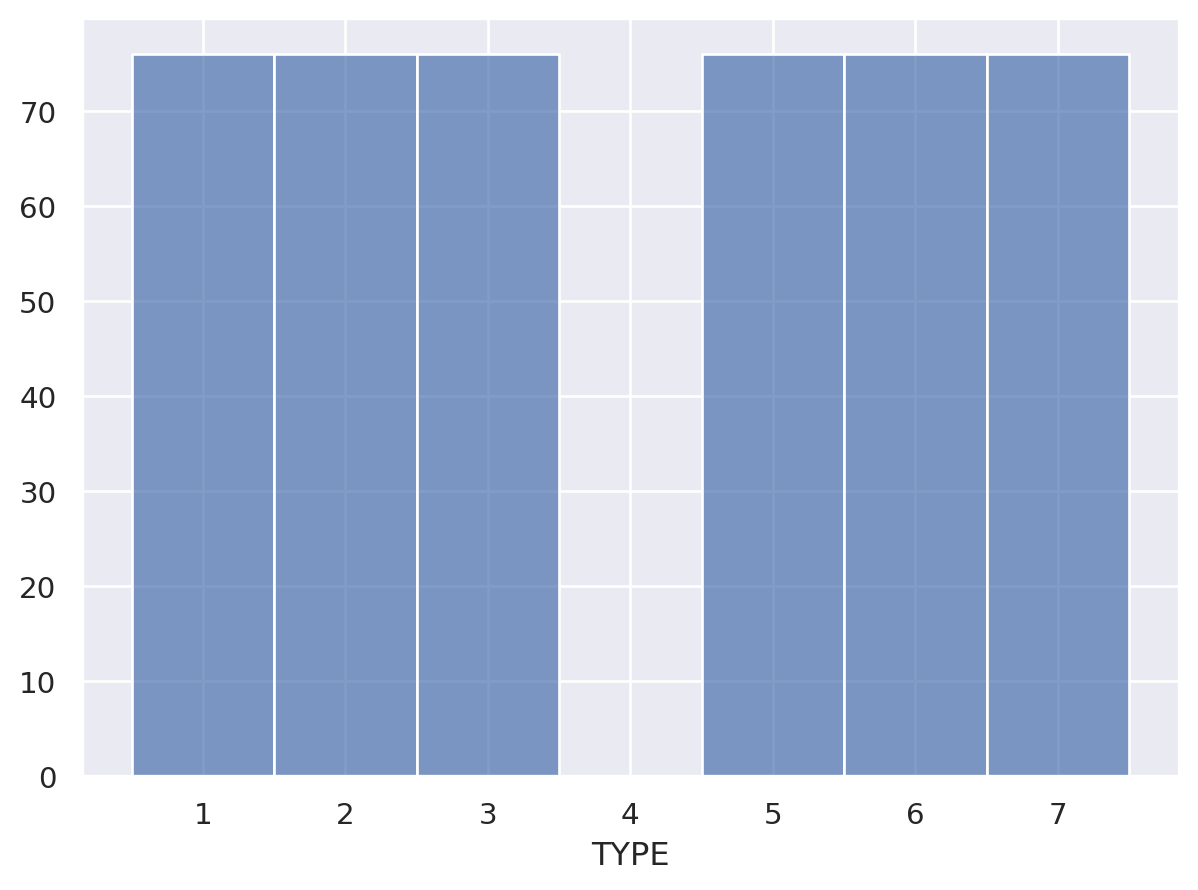

In [48]:
#let's see balance of classes

target_balance = so.Plot(y_smote)
target_balance.add(so.Bars(), so.Hist(discrete=True))

As we see it made full balance

### train test split

In [49]:
# split into train and test data

X_smote_train, X_smote_test, y_smote_train, \
               y_smote_test = train_test_split(X_smote, y_smote, train_size=0.8,
                                               shuffle=True, random_state=ceed)

### make pipeline

In [50]:
smote_pipeline = make_pipeline(scaler, knn_clf)
smote_pipeline.fit(X_smote_train, y_smote_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

###CV score

In [51]:
#cross validation score
smote_cv_score = cross_val_score(smote_pipeline, X_smote_train, y_smote_train,
                                 cv=5, scoring="roc_auc_ovr")

#print out score

print(f"cross validation score after synthtic balance data is {smote_cv_score.mean()}")

cross validation score after synthtic balance data is 0.9800984864160345


###Classification report and confusion matrix

In [52]:
smote_pred = smote_pipeline.predict(X_smote_test)

In [53]:
# print out report
print(classification_report(y_smote_test, smote_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.84      0.84      0.84        19
           3       1.00      1.00      1.00        10
           5       0.79      0.79      0.79        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.93      0.93      0.93        92



**Conclusion**

as we see from report scores for any classes are still differenet but looks better, but it could be overfitting

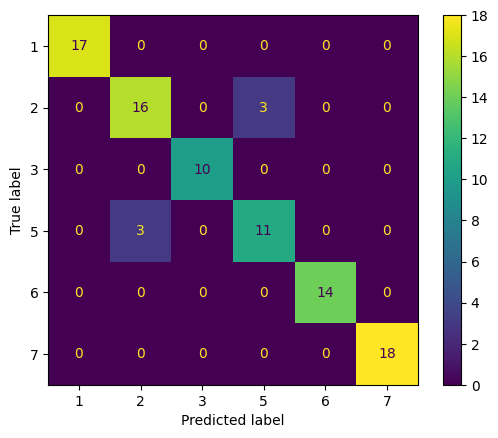

In [54]:
# plot confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_smote_test, smote_pred)

plt.show()

### Conclusion
on this dataset SMOTE workes not bad, but still need to observe more to avoid overfitting

#OneVsRestClassifier

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

OneVsRestClassifier can also be used for multilabel classification. To use this feature, provide an indicator matrix for the target y when calling .fit. In other words, the target labels should be formatted as a 2D binary (0/1) matrix, where [i, j] == 1 indicates the presence of label j in sample i. This estimator uses the binary relevance method to perform multilabel classification, which involves training one binary classifier independently for each label.

##Split

In [55]:
X_poly_train, X_poly_test, y_poly_train, \
                y_poly_test = train_test_split(X_poly, y_poly, train_size=0.8,
                                               shuffle=True, random_state=ceed)

In [56]:
# #make pipeline
# pipe_one_vs_rest = make_pipeline(scaler, OneVsRestClassifier(knn_clf))
# # fit data
# pipe_one_vs_rest.fit(X_train, y_train)

In [57]:
# pipe_one_vs_rest = OneVsRestClassifier(pipe)

In [58]:
# # fit data
# pipe_one_vs_rest.fit(X_train, y_train)

In [59]:
# one_vs_rest = OneVsRestClassifier(knn_clf).fit(X_train,y_train)

In [60]:
# # OneVsRestClassifier don't works good with make_pipeline so i'll create all manually
# x_train_scaled, x_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

OneVsRest classifier made bad work with scaled data, so i used clean data

In [61]:
#define onevsrest classifier
one_cv = OneVsRestClassifier(knn_clf)

In [62]:
#fit it on scaled data
one_cv.fit(X_poly_train, y_poly_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [63]:
#cross validation score
one_cv_score = cross_val_score(one_cv, X_poly_train, y_poly_train,
                                 cv=5, scoring="roc_auc_ovr")

#print out score

print(f"cross validation score of one vs rest classifier is {one_cv_score.mean()}")

cross validation score of one vs rest classifier is 0.9690709329477712


##Classification report and confusion matrix

In [64]:
one_pred = one_cv.predict(X_poly_test)

In [65]:
# print out report
print(classification_report(y_poly_test, one_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.82      1.00      0.90        14
           3       1.00      1.00      1.00         3
           5       1.00      0.25      0.40         4
           6       0.50      0.33      0.40         3
           7       0.78      0.88      0.82         8

    accuracy                           0.86        43
   macro avg       0.85      0.74      0.75        43
weighted avg       0.87      0.86      0.84        43



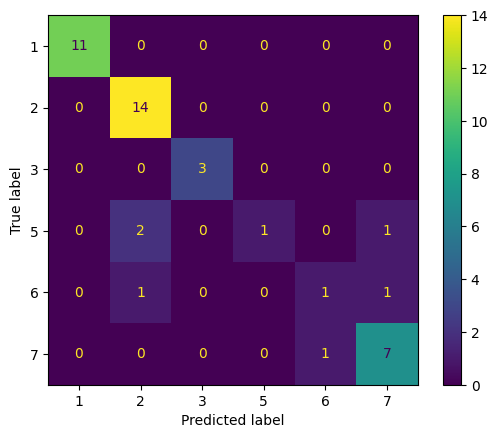

In [66]:
# plot confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, one_pred)

plt.show()

##Conclusion

OneVsRestClassifier workes not good with this data like SMOTE.
In case when 5 and 6 class replace to 2 seems that this type of balancing data works not such good like previous smote technique

---

